In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt

# Scikit-learn for preprocessing and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline

# TensorFlow and Keras for building the deep learning model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LeakyReLU, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2



In [2]:
df = pd.read_csv("/mnt/d/SalaryPredictionDataScientists/SalariesData/DataScience_salaries_2024.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [4]:
# Check for missing values and data types
print("Dataset information:")
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [5]:
print("Summary statistics:")
df.describe()

Summary statistics:


,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [6]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [7]:
#Pre-processing if needed for the given dataset

# Define columns based on data type
numerical_features = ['salary_in_usd']  # Add any other numerical columns if they exist
categorical_features = ['experience_level', 'employment_type', 'job_title', 'employee_residence']

# Fill missing numerical values with the median, and categorical with the most frequent value
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [8]:
# Transform categorical variables and prepare feature matrix X and target variable y
X = df.drop(columns=['salary'])  # Remove target column from features
y = df['salary_in_usd']  # Define target variable

# Apply transformations to features
X_prepared = preprocessor.fit_transform(X)

# Check the shape of the transformed features
print("Shape of transformed features:", X_prepared.shape)

Shape of transformed features: (14838, 250)


In [9]:
# Standardize the numerical features with with_mean=False
scaler = StandardScaler(with_mean=False)  # Set with_mean=False to handle sparse matrices
X_prepared = scaler.fit_transform(X_prepared)

# Check the first few rows to confirm transformation
print("Transformed feature matrix:")
print(X_prepared[:5])

Transformed feature matrix:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 25 stored elements and shape (5, 250)>
  Coords	Values
  (0, 0)	0.5802032201608008
  (0, 3)	2.3432950833186106
  (0, 7)	15.027396638488266
  (0, 98)	2.485237303206165
  (0, 177)	86.1394226519265
  (1, 0)	0.5254405454770587
  (1, 3)	2.3432950833186106
  (1, 7)	15.027396638488266
  (1, 30)	27.96334476701327
  (1, 200)	60.913875838357235
  (2, 0)	0.5178470970689399
  (2, 3)	2.3432950833186106
  (2, 7)	15.027396638488266
  (2, 98)	2.485237303206165
  (2, 200)	60.913875838357235
  (3, 0)	1.1211059974154602
  (3, 3)	2.3432950833186106
  (3, 7)	15.027396638488266
  (3, 123)	9.593840845668065
  (3, 209)	43.07842313092561
  (4, 0)	1.3822684539252246
  (4, 4)	2.101420802721994
  (4, 7)	15.027396638488266
  (4, 122)	54.48486337586088
  (4, 204)	14.195722091719437


In [10]:
# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

# Check the shape of each set
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (11870, 250) (11870,)
Testing set shape: (2968, 250) (2968,)


In [11]:
# Save processed data to .npz files
np.savez("processed_data.npz", X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)


In [12]:
# Define the model architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(256, kernel_regularizer=l2(0.001)),
    LeakyReLU(negative_slope=0.1), 
    Dropout(0.3),
    
    Dense(128, kernel_regularizer=l2(0.001)),
    LeakyReLU(negative_slope=0.1), 
    Dropout(0.3),
    
    Dense(64, kernel_regularizer=l2(0.001)),
    LeakyReLU(negative_slope=0.1),  
    Dense(1) 
])

W0000 00:00:1730153156.047721     447 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [13]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [14]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 25860544512.0000 - mean_absolute_error: 145051.4531 - val_loss: 5635016704.0000 - val_mean_absolute_error: 55445.5195
Epoch 2/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4295380992.0000 - mean_absolute_error: 48141.3906 - val_loss: 3047135488.0000 - val_mean_absolute_error: 41875.7188
Epoch 3/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3092374272.0000 - mean_absolute_error: 41264.8945 - val_loss: 2548343808.0000 - val_mean_absolute_error: 37633.1133
Epoch 4/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2645129472.0000 - mean_absolute_error: 38403.1680 - val_loss: 2164764928.0000 - val_mean_absolute_error: 34637.1172
Epoch 5/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2342049792.0000 - mean_absolute_error: 34794.2539 - val_loss: 1881097856.0000 - val_mean_absolute_error: 31716.5098
Epoch 6/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1993672832.0000 - mean_absolute_error: 32353.0078 - 

In [15]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {test_mae}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13704910.0000 - mean_absolute_error: 1383.5050
Test Mean Absolute Error: 1345.390625


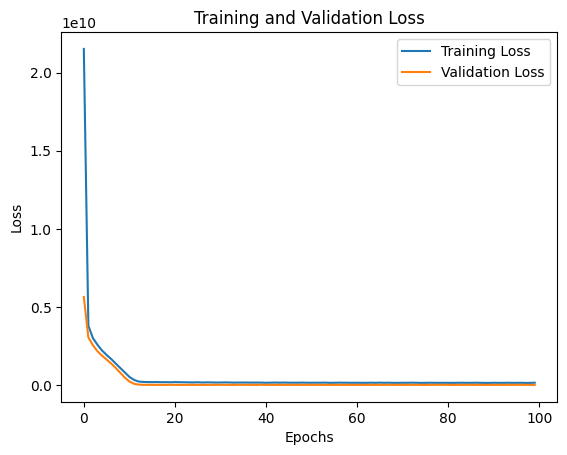

In [16]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()